# Solving The Travelling Salesperson Problem (TSP)


"A salesperson has to visit a number of addresses, they must visit each address once and once only. How do we find the sortest route for the salesperson?"

There are lots of everyday problems based on the TSP such as home deliveries, so being able to solve the TSP is very useful.

This workshop will explain a number of ways in which we can solve the TSP.  

We'll be using the Python language to help us.

The workshop is divided into cells (like this one), some of the cells are just for reading (like this) and some have some Python code in them (like the one below). When you've finished reading this, press the "run" button (at the top) and we'll move onto the next cell, press the run button again to run the Python code in the next cell.

In [1]:
import tspcode as tsp
tsp.setup()

Don't worry about the code in the cell above, it is setting up a problem for us to solve.

## 1. A Problem for Us to Solve

In the center of Edinburgh we need to make 26 deliveries (A-Z), we start and finish from Edinburgh Castle. We want to make the deliveries travelling the shortest distance possible.


## Task: can you re-arrange the route to make it shorter?
##  What's the shortest route that you can find?

The cell below creates a route from A-Z via each delivery in order, then it prints out the distance of the route, change the order of the visits to see if you can make the route shorter. The cell underneath draws a map of the route which you might find useful

In [2]:
route = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
length = tsp.measure (route)
print(length)

39.100236267


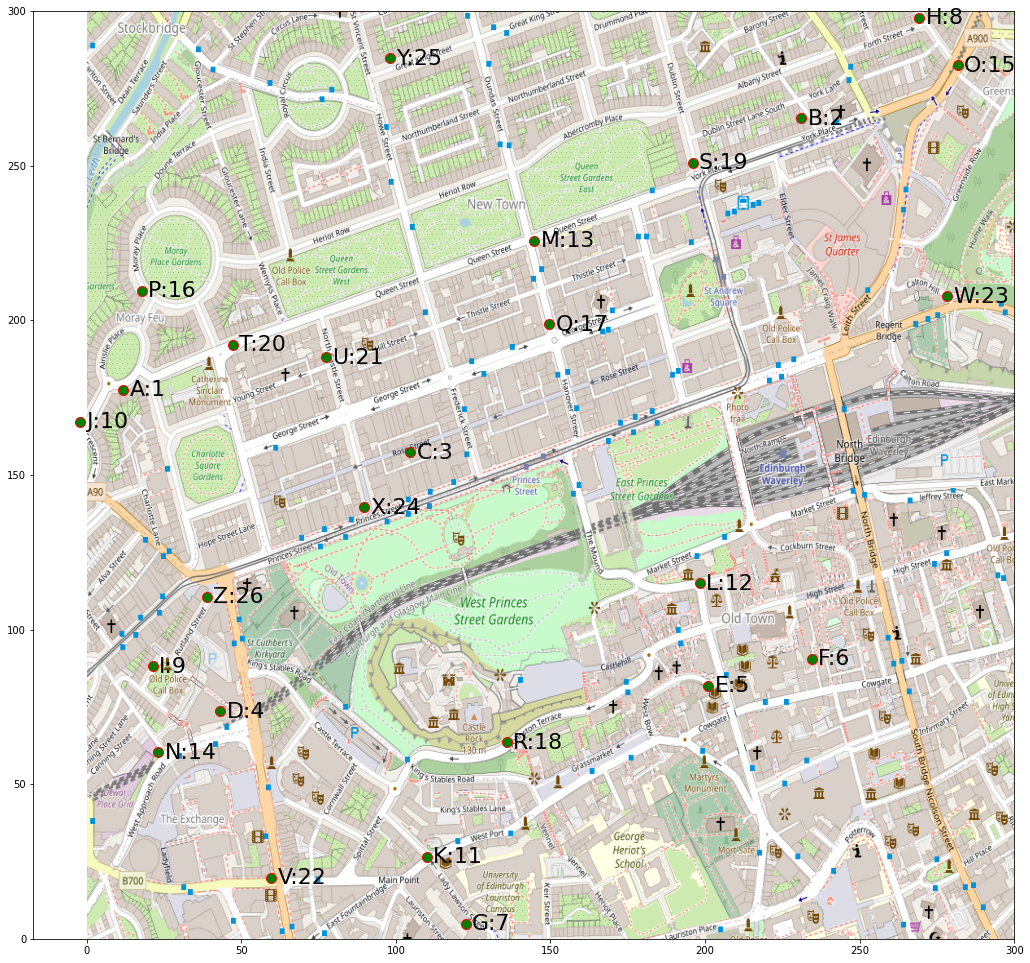

In [4]:
tsp.drawMap(route)

The problem that we have is that there are far too many possible routes for us to try each one. 

How many routes are there?

If there were 4 visits A-D then the possible routes would be :

|   |  |
|--------|------|
| ABCD   | ABDC |
| ACDB   | ACBD |
| ADBC   | ADCB |
| BACD   | BADC |
| BCAD   | BCDA |
| BDAC   | BDCA |
| CABD   | CADB |
| CBAD   | CBDA |
| CDAB   | CDBA |
| DABC   | DACB |
| DBAC   | DBCA |
| DCAB   | DCBA |
| ABCD   | ABDC |
| ACDB   | ACBD |
| ADBC   | ADCB |
| BACD   | BADC |
| BCAD   | BCDA |
| BDAC   | BDCA |
| CABD   | CADB |
| CBAD   | CBDA |
| CDAB   | CDBA |
| DABC   | DACB |
| DBAC   | DBCA |
| DCAB   | DCBA |

The number of possible routes (24) can be worked out by 4x3x2x1 = 24

For our problem with 26 visits there would be: 40329146112660570000000000 routes for us to check !!!


That's too many routes for us to check each one, and it would take the computer several hours to work through them.

##  2. Building a route

Rather than testing every single route, we can write a program to build a route using a simple rule called the nearest neighbour rule...

*When deciding which visit to make next, always go to the closest visit available to you.*

So, if we start at the Castle the nearest visit is 'R', then it is 'G' and so on.....

You can run the program in cell below, it adds each visit to the route until there are no visits left to add.

Does the nearest neighbour rule find a shorter route than your route?


In [5]:
solution = ''
remaining = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
best =''

while len(remaining) > 0:
    print(remaining)
    best, remaining = tsp.neighbour(best,remaining)
    solution = solution +best


print(solution)
length = tsp.measure(solution)
print(length)

ABCDEFGHIJKLMNOPQRSTUVWXYZ
ABCDEFGHIJKLMNOPQSTUVWXYZ
ABCDEFHIJKLMNOPQSTUVWXYZ
ABCDEFHIJLMNOPQSTUVWXYZ
ABCDEFHIJLMNOPQSTUWXYZ
ABCDEFHIJLMNOPQSTUWXY
ABCDEFHJLMNOPQSTUWXY
ABCEFHJLMNOPQSTUWXY
ABCEFHJLMOPQSTUWXY
ABCEFHJLMOPQSUWXY
BCEFHJLMOPQSUWXY
BCEFHLMOPQSUWXY
BCEFHLMOQSUWXY
BCEFHLMOQSWXY
BCEFHLMOQSWY
BEFHLMOQSWY
BEFHLMOSWY
BEFHLOSWY
BEFHLOWY
EFHLOWY
EFLOWY
EFLWY
EFLY
ELY
LY
Y
RGKVZIDNTAJPUXCQMSBHOWFELY
14.373743870999999


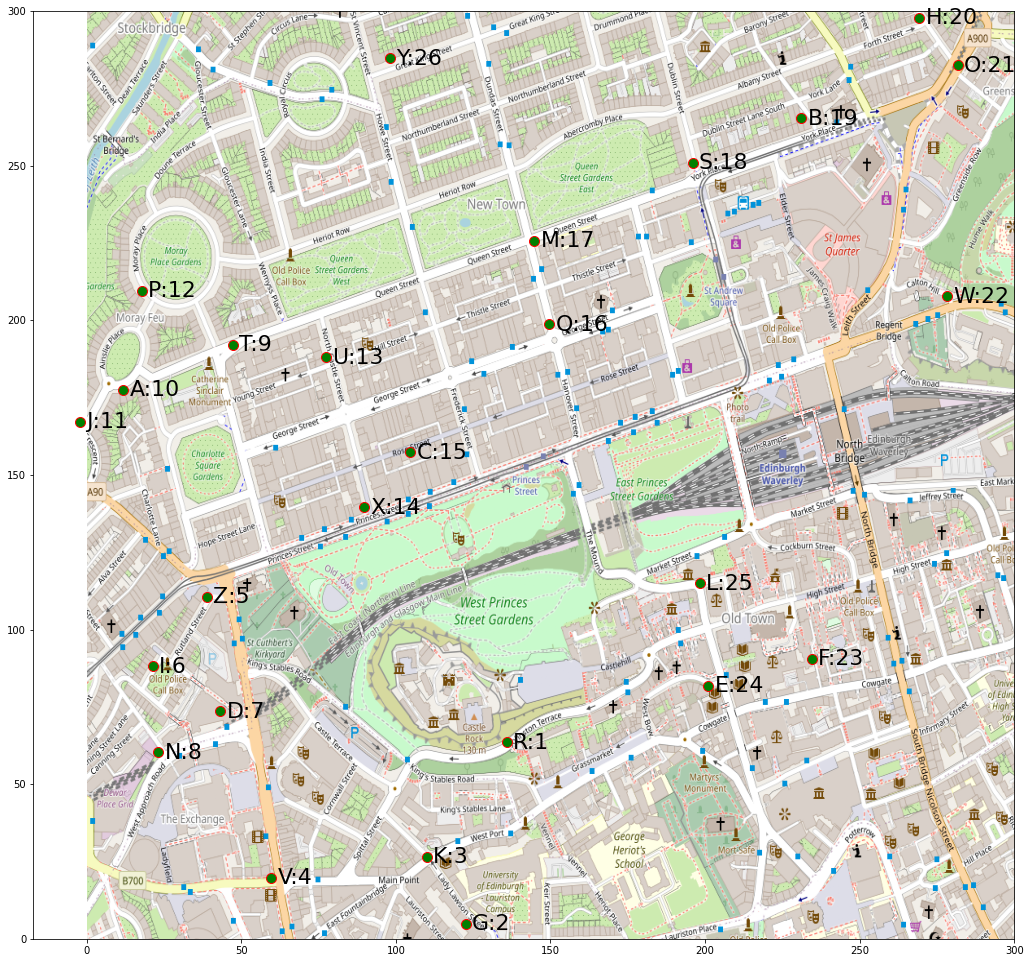

In [6]:
tsp.drawMap(solution)

## 3. A Simple hill climber.....

The nearest neighbour rule let's us build a route quickly, but although it might be quite a good route, it's probably not the best.

We're going to try and build a route with another type of program. This program uses a very simple type of *artificial inteligence*.

The program does something very simple, it starts with a random route (A-Z) and measures it. Then it randomly changes the solution and measures the lenngth of the solution, if it is shorter (better) then it keeps the change otherwise it throws the change away and tries another random change.

Although this is really a very simple thing to do, if you so it enough then you will start to find shorter routes.

The program below is quite complicated, but the word FOR tells it repeat some instructions over and over again. These instructions make the random alterations and decide whether to throw away or to keep the change.

The number 100 at the start tells the program to try 100 changes. Everytime a change works, it prints a message showing the new length!

Run the programe and see how long the route is.

What happens if you let the program run for more tries?  (why not try 200 or even 500 tries?)

Can you beat the Hill Climber ???

In [13]:
tries = 100
solution = tsp.shuffle('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
best = tsp.measure (solution)

for x in range(0, tries):
    old = solution #solution.copy()
    solution = tsp.random_change(solution)
    n = tsp.measure (solution)
    if (n >= best):
        solution = old
    else:
        print(str(x) + " Found new best! "+ str(n))
        best = n


length = tsp.measure(solution)
print("My route is " + str(length))

['U', 'B', 'I', 'E', 'D', 'P', 'T', 'Q', 'S', 'L', 'H', 'F', 'J', 'O', 'N', 'V', 'Z', 'C', 'Y', 'K', 'A', 'W', 'R', 'G', 'M', 'X']
0 Found new best! 36.950047482
2 Found new best! 36.880493483
3 Found new best! 36.483177798999996
5 Found new best! 34.967233799
6 Found new best! 33.984409757
8 Found new best! 30.735400227
10 Found new best! 29.867907226
13 Found new best! 29.792567574
16 Found new best! 29.357929575
23 Found new best! 29.325060212
24 Found new best! 28.985039526999994
25 Found new best! 28.616831210999997
28 Found new best! 24.599333258999998
56 Found new best! 24.586930258
63 Found new best! 23.600531258
82 Found new best! 23.01894726
86 Found new best! 22.60025826
87 Found new best! 22.600258259
My route is 22.600258259


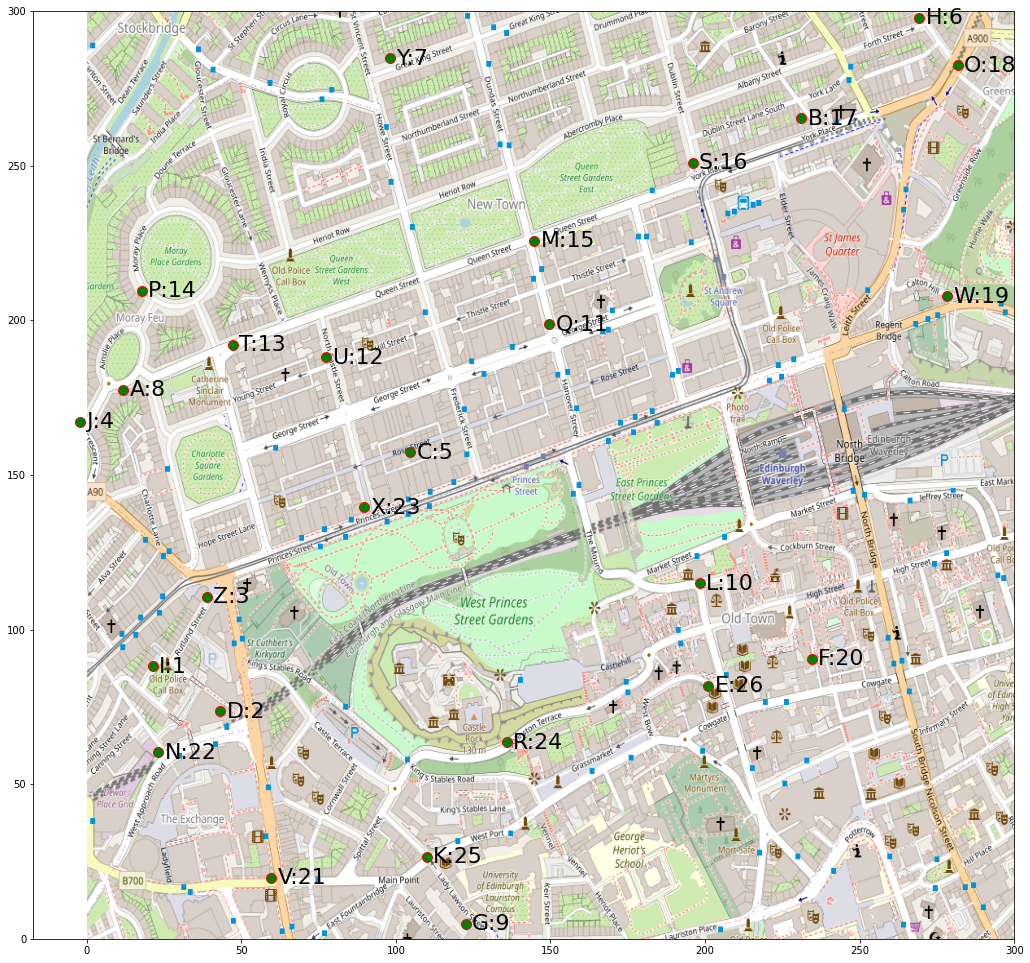

In [14]:
tsp.drawMap(solution)